Project Deliverable 2 - D7 311

https://docs.google.com/document/d/1Cg8O-tY58vciQ_TYi1MpPFZ730fU_YyTs6GBZ0SMAj4/edit#


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
#import censusdata
import geopandas as gpd 

dfall = pd.read_csv('all_districts.csv')
df7 = pd.read_csv('district7_311.csv')
entire_dataset = pd.concat([dfall, df7])

C:\Users\Brian\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
# Brian

from tqdm import tqdm

def calcTime(start, end):
    date_format_str = '%Y-%m-%d %H:%M:%S'
    start = datetime.strptime(start, date_format_str)
    end =   datetime.strptime(end, date_format_str)
    diff = end-start
    diff_in_hours = diff.total_seconds() / 3600
    return diff_in_hours


closedAll = dfall.loc[dfall['case_status'] == 'Closed']
closed7 = df7.loc[df7['case_status'] == 'Closed']


parkingAll = closedAll[closedAll['type'] == 'Graffiti Removal']
#^^ Fill above line with desired type to filter by ^^
totalAll = 0
for i in tqdm(range(parkingAll.shape[0])):
    totalAll += calcTime(parkingAll.iloc[i, 2], parkingAll.iloc[i, 4])
print("Average number of hours from start to close for entire dataset of closed requests is " + str(totalAll/parkingAll.shape[0]))

parking7 = closed7[closed7['type'] == 'Graffiti Removal']
#^^ Fill above line with desired type to filter by ^^
total7 = 0
for i in tqdm(range(parking7.shape[0])):
    total7 += calcTime(parking7.iloc[i, 2], parking7.iloc[i, 4])
print("Average number of hours from start to close for D7 of closed requests is " + str(total7/parking7.shape[0]))

100%|█████████████████████████████████████████████████████████████████████████| 13748/13748 [00:01<00:00, 12268.19it/s]


Average number of hours from start to close for entire dataset of closed requests is 1783.3772889995985


100%|███████████████████████████████████████████████████████████████████████████| 1699/1699 [00:00<00:00, 12088.15it/s]


Average number of hours from start to close for D7 of closed requests is 1574.4526919429748


All districts
D7

Parking Enforcement:
25.053529225164024
26.816884236535145

Requests for Street Cleaning:
27.331637748205722
33.51520470383303

Needle Pickup:
5.876327023168262
4.16266212849558

Improper Storage of Trash (Barrels):
12.005293261612655
10.76099217059118

Request for Pothole Repair:
95.2364818173561
122.74863540478302

Missed Trash/Recycling/Yard Waste/Bulk Item:
17.739909777613722
16.81068601262743

CE Collection:
7.494123658390256
10.112822203516664

Schedule a Bulk Item Pickup:
122.61573509367392
97.18632197188525

Poor Conditions of Property:
15.829662988100472
13.853281245369168

Traffic Signal Inspection:
238.52227974123272
267.4374609213882

Street Light Outages:
867.6474443859496
1088.7094679550917

Abandoned Vehicles:
693.7597961562913
667.0902715922107

Tree Maintenance Requests:
1409.724410183832
1341.5765466791556

Sign Repair:
294.21252826597987
375.23165973340497

Sidewalk Repair (Make Safe):
437.75459131664223
503.7376227564684

Ground Maintenance:
135.74386604656527
139.04445825073174

Request for Recycling Cart:
627.1779033198122
483.8275960486735

Pick up Dead Animal:
10.369390959374536
12.434857629216955

Graffiti Removal:
1783.3772889995985
1574.4526919429748

• Display a summary of what request types are most common overall and by district

In [1]:
# Kevin
import pandas as pd
df_district7 = pd.read_csv('311_data/district7_311.csv')
df_rest = pd.read_csv('311_data/all_districts.csv')

C:\Users\kevmi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


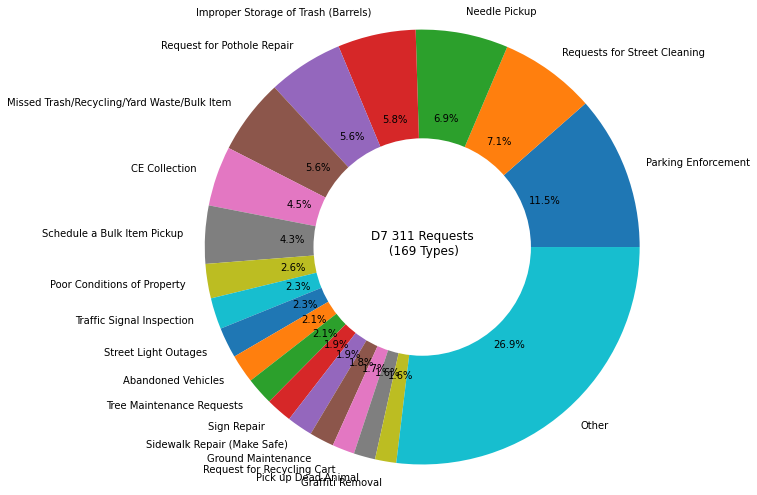

In [2]:
from matplotlib import pyplot as plt
# Generate relative frequencies of type of 3.11 requests D7
type_frequencies = df_district7['type'].value_counts(normalize='true').head(19)
complement = 1 - type_frequencies.sum()
type_frequencies['Other'] = complement

fig, ax = plt.subplots()
ax.pie(type_frequencies, labels=type_frequencies.keys(), autopct='%1.1f%%', radius=2)
fig.set_size_inches(5,5)
circle = plt.Circle(xy=(0,0), radius=1, facecolor='white')
plt.gca().add_artist(circle)
ax.set_title('D7 311 Requests\n (169 Types)', y=0.45)

plt.show()

## Types of request analysis: District 7
During the last 5 years, District 7 has had 169 different types of requests filed. However 19 of these represent aroun 73% of the total requests. Parking enforcement requests tops the list with 11.5% of all requests, followed by requests for street cleaning, Needle pickup, improper storage of trash, requests for potholerepair, and missed items that represent at least 5% of the requests each. 


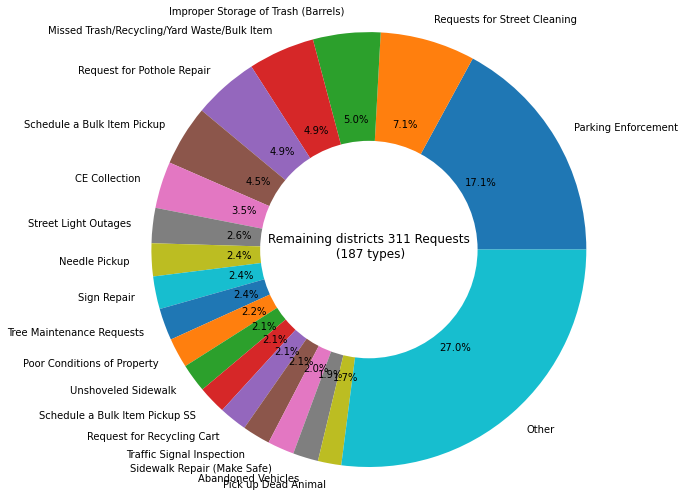

In [3]:
# Generate relative frequencies of type of 3.11 requests for the rest of the districts as a whole
type_frequencies = df_rest['type'].value_counts(normalize='true').head(19)
complement = 1 - type_frequencies.sum()
type_frequencies['Other'] = complement

fig, ax = plt.subplots()
ax.pie(type_frequencies, labels=type_frequencies.keys(), autopct='%1.1f%%', radius=2)
fig.set_size_inches(5,5)
circle = plt.Circle(xy=(0,0), radius=1, facecolor='white')
plt.gca().add_artist(circle)
ax.set_title('Remaining districts 311 Requests\n (187 types)', y=0.45)

plt.show()

### Types of requests analysis: Remaining districts of the districts

Grouping the rest of the districts as a whole, we find that there is slightly more variety, with 18 more types of requests compared to D7's, but again aroun 73% of all requests are contained in the top 19 types. And consistent with D7, Parking enforcement and requests for street cleaning are the top 7 types of requests, with 17.1% and 7.1% of the total requests.

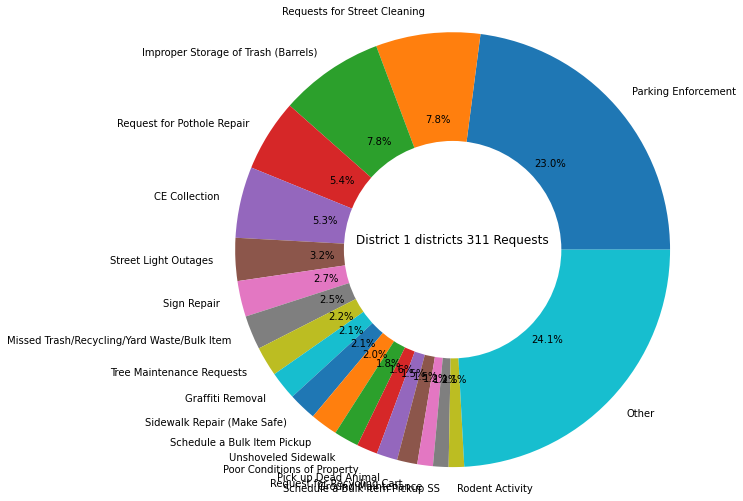

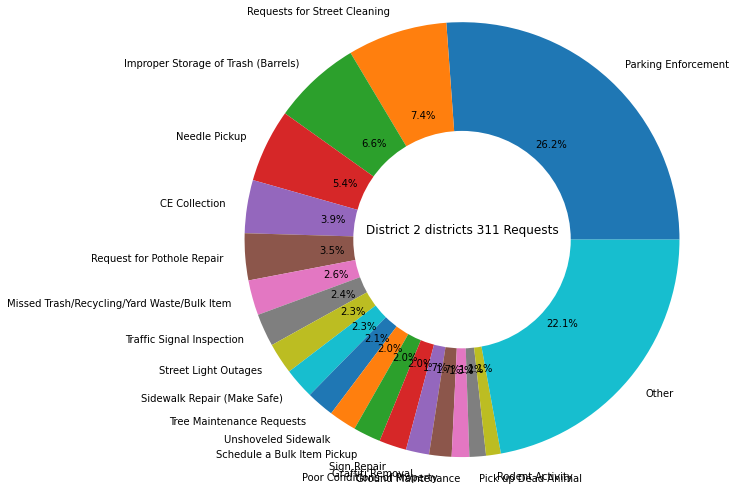

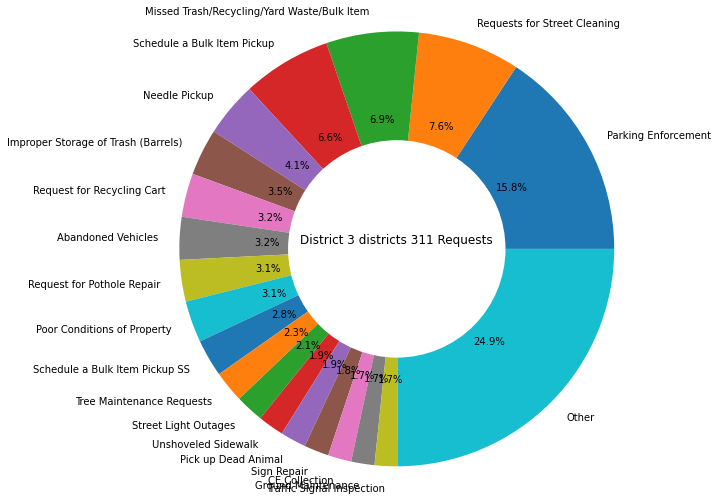

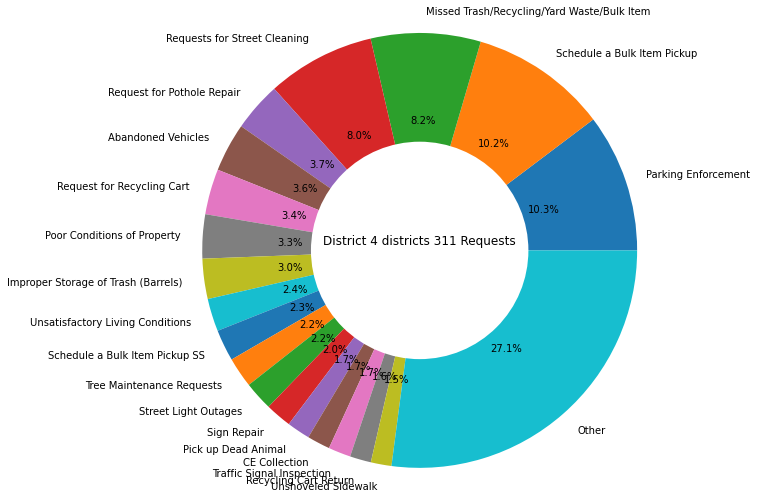

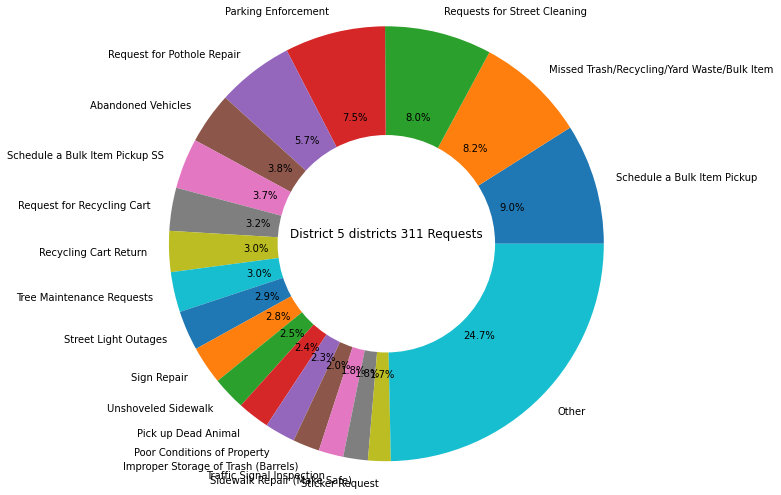

<ipython-input-4-71125b03ccb7>:9: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(type_frequencies, labels=type_frequencies.keys(), autopct='%1.1f%%', radius=2)


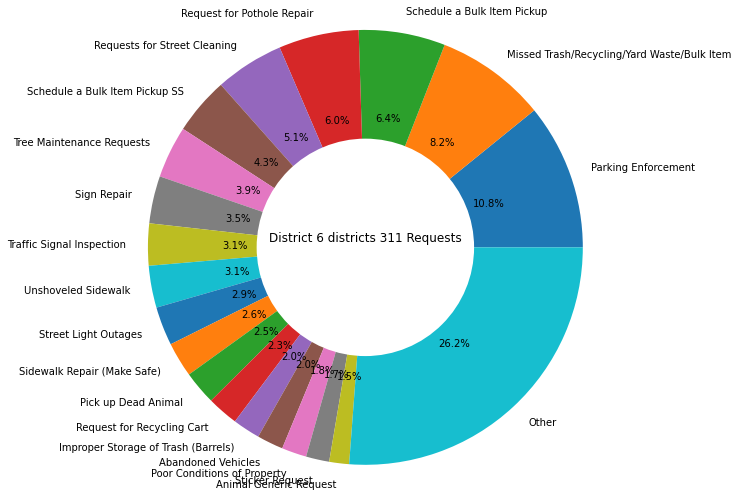

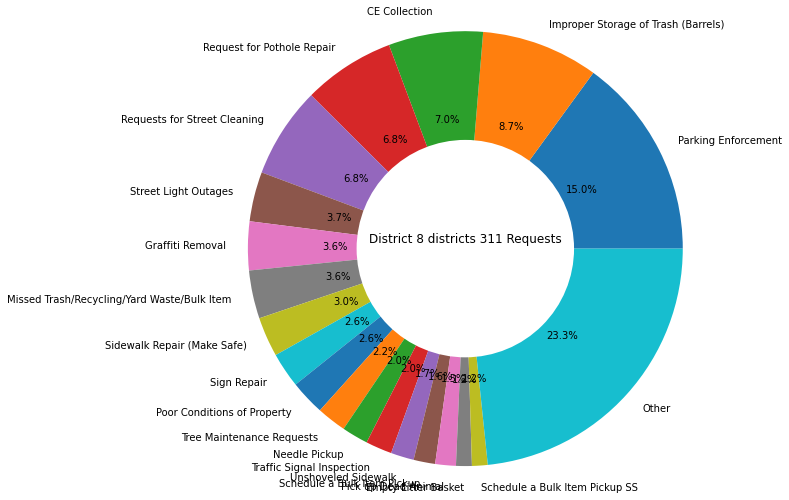

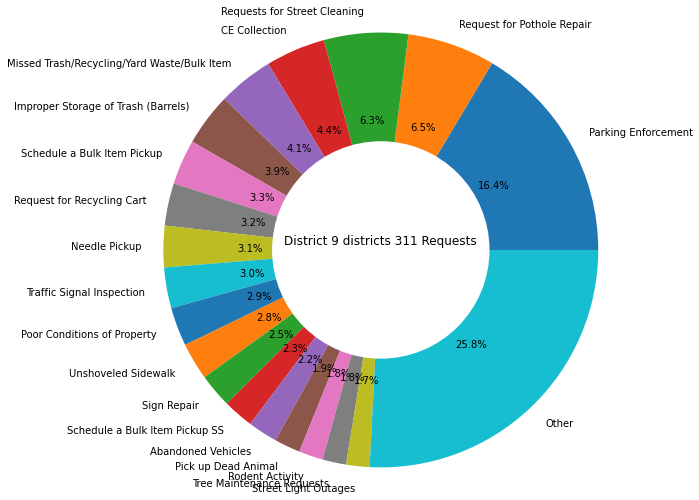

In [4]:
# Generate relative frequencies of type of 3.11 requests for each of the remaining districts
def graph_types(district):
    mask = df_rest['city_council_district'] == str(district)
    type_frequencies = df_rest[mask]['type'].value_counts(normalize='true').head(19)
    complement = 1 - type_frequencies.sum()
    type_frequencies['Other'] = complement

    fig, ax = plt.subplots()
    ax.pie(type_frequencies, labels=type_frequencies.keys(), autopct='%1.1f%%', radius=2)
    fig.set_size_inches(5,5)
    circle = plt.Circle(xy=(0,0), radius=1, facecolor='white')
    plt.gca().add_artist(circle)
    ax.set_title('District ' + str(district) + ' districts 311 Requests', y=0.5)
    plt.show()
    
# Generate graphs for each district individually
for d in range(1, 10):
    if d != 7:
        graph_types(d)

,STATEFP,COUNTYFP,Tract,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,25,027,724100,25027724100,7241,Census Tract 7241,G5020,S,53059320,1639518,+42.2566908,-072.1581690,"POLYGON ((-72.21788 42.27009, -72.21771 42.270..."
1,25,027,759100,25027759100,7591,Census Tract 7591,G5020,S,25520166,1427831,+42.2096822,-072.0401777,"POLYGON ((-72.07888 42.21475, -72.07880 42.214..."
2,25,025,010500,25025010500,105,Census Tract 105,G5020,S,189911,10075,+42.3445514,-071.0846274,"POLYGON ((-71.08776 42.34730, -71.08735 42.347..."
3,25,025,091300,25025091300,913,Census Tract 913,G5020,S,262560,0,+42.3199357,-071.0668701,"POLYGON ((-71.07220 42.32136, -71.07174 42.321..."
4,25,025,030500,25025030500,305,Census Tract 305,G5020,S,193673,292691,+42.3675851,-071.0516956,"POLYGON ((-71.05979 42.36877, -71.05883 42.369..."


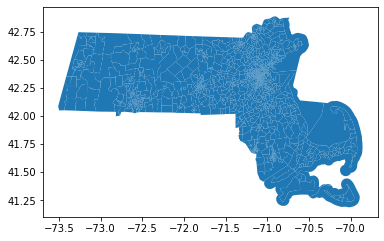

In [32]:
# Samantha
gdf = gpd.read_file("tl_2015_25_tract/tl_2015_25_tract.shp")
gdf.plot()
gdf = gdf.rename(columns={"TRACTCE": "Tract"})
gdf.head()


#can maybe merge GEOID with 



In [33]:
import censusdata # pip install CensusData

#income data: MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS) --> B19013_001E.  Maybe we want other columns like MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS) (BLACK OR AFRICAN AMERICAN ALONE HOUSEHOLDER)	? 
census_data = censusdata.download('acs5', 2015,
           censusdata.censusgeo([('state', '25'),
                                 ('county', '025'),
                                 ('tract', '*')]),
          ['B02001_001E', 'B02001_002E', 'B02001_003E',
           'B02001_004E', 'B02001_005E', 'B02001_006E', 
           'B02001_007E', 'B02001_008E', 'B02001_009E', 'B02001_010E','B19013_001E']) #                                 
column_names = ['Total_race', 'White', 'African_American', 'American_Indian', 'Asian', 'Native Hawaiian', 'Other_race', 'Two_or_more_races', 'Two_or_more_including_other', 'Two_or_more_excluding_other', 'Median_household_income'] #column3 is black or african american, 4 is American Indian and Alaska Native, 'Native Hawaiian or Pacific Islander, 
census_data.columns = column_names

# Add a Tract column from the original index
census_data.reset_index(inplace=True)
census_data['index'] = census_data['index'].astype(str)
census_data['Tract'] = census_data['index'].str[-6:]
census_data.set_index('index', inplace=True)
census_data.head(1)

,Total_race,White,African_American,American_Indian,Asian,Native Hawaiian,Other_race,Two_or_more_races,Two_or_more_including_other,Two_or_more_excluding_other,Median_household_income,Tract
index,,,,,,,,,,,,
"Census Tract 203.03, Suffolk County, Massachusetts: Summary level: 140, state:25> county:025> tract:020303",3574,2357,297,0,533,0,286,101,0,101,81607.0,020303


In [34]:
#merge census data with gdf --> check bc census data has data for suffolk county and gdf has data for MA. If needed can remove county field from the download function
df  = gdf.merge(census_data, on='Tract', how='left')
merged_gdf = gpd.GeoDataFrame(df)
#drop columns where county !=25 so that we only keep suffolk? (no need to imo -Ryan)

In [35]:
# Ryan
# Create a 'geometry' column of points based on longitude, latitude (note order matters here and depends on shapefile)
entire_dataset_geopoints = entire_dataset.copy()
entire_dataset_geopoints['geometry'] = gpd.points_from_xy(entire_dataset.longitude,entire_dataset.latitude)
entire_dataset_geopoints_geo = gpd.GeoDataFrame(entire_dataset_geopoints)
entire_dataset_geopoints_geo.head(1)

,Unnamed: 0,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,...,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source,geometry
0,0,101001979518,2017-01-01 00:33:05,2017-01-04 08:30:00,2017-01-02 23:48:15,ONTIME,Closed,Case Closed. Closed date : 2017-01-02 23:48:15...,Parking Enforcement,Transportation - Traffic Division,...,South Boston / South Boston Waterfront,5,Ward 6,0609,911 E Broadway,2127.0,42.3356,-71.0275,Citizens Connect App,POINT (-71.02750 42.33560)


In [36]:
# Example to show geometry column of each df we are about to spatial join
print(merged_gdf['geometry'].head(3))
print(entire_dataset_geopoints_geo['geometry'].head(3))

0    POLYGON ((-72.21788 42.27009, -72.21771 42.270...
1    POLYGON ((-72.07888 42.21475, -72.07880 42.214...
2    POLYGON ((-71.08776 42.34730, -71.08735 42.347...
Name: geometry, dtype: geometry
0    POINT (-71.02750 42.33560)
1    POINT (-71.05870 42.35940)
2    POINT (-71.11210 42.31040)
Name: geometry, dtype: geometry


In [37]:
# Perform s-join and create resulting dataframe with all the data
entire_dataset_spat_joined = entire_dataset_geopoints_geo.sjoin(merged_gdf, how="left", predicate='within')
entire_dataset_spat_joined.head(5)

,Unnamed: 0,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,...,White,African_American,American_Indian,Asian,Native Hawaiian,Other_race,Two_or_more_races,Two_or_more_including_other,Two_or_more_excluding_other,Median_household_income
0,0,101001979518,2017-01-01 00:33:05,2017-01-04 08:30:00,2017-01-02 23:48:15,ONTIME,Closed,Case Closed. Closed date : 2017-01-02 23:48:15...,Parking Enforcement,Transportation - Traffic Division,...,3621.0,39.0,0.0,74.0,0.0,47.0,17.0,10.0,7.0,103895.0
1,1,101001979520,2017-01-01 01:22:52,2017-01-04 08:30:00,2017-01-02 23:52:13,ONTIME,Closed,Case Closed. Closed date : 2017-01-02 23:52:13...,Parking Enforcement,Transportation - Traffic Division,...,4406.0,426.0,21.0,335.0,0.0,273.0,50.0,0.0,50.0,102277.0
2,2,101001979521,2017-01-01 01:24:00,2017-01-18 08:30:00,2017-01-05 15:10:54,ONTIME,Closed,Case Closed. Closed date : 2017-01-05 15:10:54...,PRINTED : Street light out RT,Public Works Department,...,5042.0,707.0,0.0,273.0,0.0,445.0,146.0,41.0,105.0,77462.0
3,5,101001979525,2017-01-01 02:33:00,NaN,2017-01-06 16:30:54,ONTIME,Closed,Case Closed. Closed date : 2017-01-06 16:30:54...,Schedule a Bulk Item Pickup,Public Works Department,...,3393.0,1651.0,0.0,528.0,0.0,726.0,259.0,24.0,235.0,64116.0
4,6,101001979526,2017-01-01 03:09:00,2017-01-02 03:09:50,2017-01-02 08:12:44,OVERDUE,Closed,Case Closed. Closed date : 2017-01-02 08:12:44...,Traffic Signal Inspection,Transportation - Traffic Division,...,4406.0,426.0,21.0,335.0,0.0,273.0,50.0,0.0,50.0,102277.0


In [42]:
entire_dataset_spat_joined['Tract']

0         060101
1         030300
2         120400
3         110103
4         030300
           ...  
147312    030300
147313    030300
147314    030300
147315    030300
147316    081900
Name: Tract, Length: 1299421, dtype: object

In [39]:
# Optional: Save the dataset to a csv (uploaded to our drive) WARNING 800mb file
# entire_dataset_spat_joined.to_csv('entire_dataset_spat_joined.csv')